In [3]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x1=np.array([1,2,3,4,5,6])
x2=np.array([7.5,11,16,18,20,26])

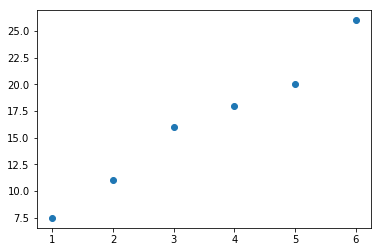

In [5]:
plt.scatter(x1,x2)

In [7]:
x=np.c_[x1,x2]

In [11]:
pca=PCA()
reduced=pca.fit_transform(x)
reduced

array([[-9.26049952e+00,  9.65263430e-03],
       [-5.62047228e+00,  2.38560598e-02],
       [-5.36562171e-01, -3.68391297e-01],
       [ 1.65958219e+00,  5.22629108e-02],
       [ 3.85572654e+00,  4.72917119e-01],
       [ 9.90222524e+00, -1.90297426e-01]])

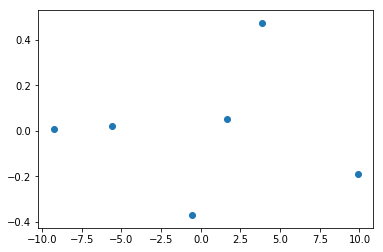

In [12]:
plt.scatter(reduced[:,0],reduced[:,1])

In [13]:
pca=PCA(n_components=1)
reduced=pca.fit_transform(x)
reduced

array([[-9.26049952],
       [-5.62047228],
       [-0.53656217],
       [ 1.65958219],
       [ 3.85572654],
       [ 9.90222524]])

In [15]:
pca.explained_variance_

array([46.66187276])

In [14]:
pca.inverse_transform(reduced)

array([[ 0.99070848,  7.50261555],
       [ 1.97703643, 11.00646421],
       [ 3.35460926, 15.90017805],
       [ 3.94969232, 18.01416153],
       [ 4.54477538, 20.12814502],
       [ 6.18317813, 25.94843564]])

In [22]:
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler

In [18]:
boston = datasets.load_boston()

In [23]:
scaler=StandardScaler()
X=scaler.fit_transform(boston.data)

In [24]:
pca=PCA()
reduced=pca.fit_transform(X)
reduced
pca.explained_variance_

array([6.13477883, 1.43489911, 1.24362073, 0.85949754, 0.83621879,
       0.6609568 , 0.54008485, 0.39732939, 0.27798432, 0.22069597,
       0.18653252, 0.16950243, 0.0636413 ])

In [29]:
total=pca.explained_variance_.sum()
k=0
taken=0
while taken/total <0.95:
    taken+=pca.explained_variance_[k]
    k=k+1
print(k)

9


In [30]:
pca=PCA(n_components=k)
reduced=pca.fit_transform(X)
pca.explained_variance_

array([6.13477883, 1.43489911, 1.24362073, 0.85949754, 0.83621879,
       0.6609568 , 0.54008485, 0.39732939, 0.27798432])

In [31]:
cancer=datasets.load_breast_cancer()

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target, random_state=1)

In [40]:
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB(priors=None)

In [41]:
clf.score(x_test,y_test)

0.9440559440559441

In [43]:
cancerx=scaler.fit_transform(cancer.data)

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(cancerx,cancer.target, random_state=1)

In [64]:
pca=PCA()
reduced=pca.fit_transform(cancerx)
pca.explained_variance_.shape

(30,)

In [65]:
total=pca.explained_variance_.sum()
k=0
taken=0
while taken/total <0.95:
    taken+=pca.explained_variance_[k]
    k=k+1
print(k)

10


In [66]:
pca=PCA(n_components=10)
reduced=pca.fit_transform(cancerx)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(reduced,cancer.target, random_state=1)

In [68]:
clf2=GaussianNB()
clf2.fit(xtrain,ytrain)

GaussianNB(priors=None)

In [69]:
clf.score(x_test,y_test) , clf2.score(xtest,ytest)

(0.9440559440559441, 0.9230769230769231)